In [190]:
from sklearn.datasets import load_breast_cancer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

bc = load_breast_cancer()
data = bc.data
labels = np.reshape(bc.target,(569,1))
features = bc.feature_names
features_labels = np.append(features,'label')
final_data = np.concatenate([data,labels],axis=1)
df = pd.DataFrame(final_data)

df.columns = features_labels
df['label'].replace(0, 'Benign',inplace=True)
df['label'].replace(1, 'Malignant',inplace=True)

In [183]:

x = df.loc[:, features].values
# normalizing: mean=0; std=1
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
pC_df = pca.fit_transform(x)
principal_df = pd.DataFrame(data = pC_df,
columns = ['PC1', 'PC2'])
principal_df.tail()

,PC1,PC2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


Explained variation per principal component:[0.44272026 0.18971182]


<Figure size 432x288 with 0 Axes>

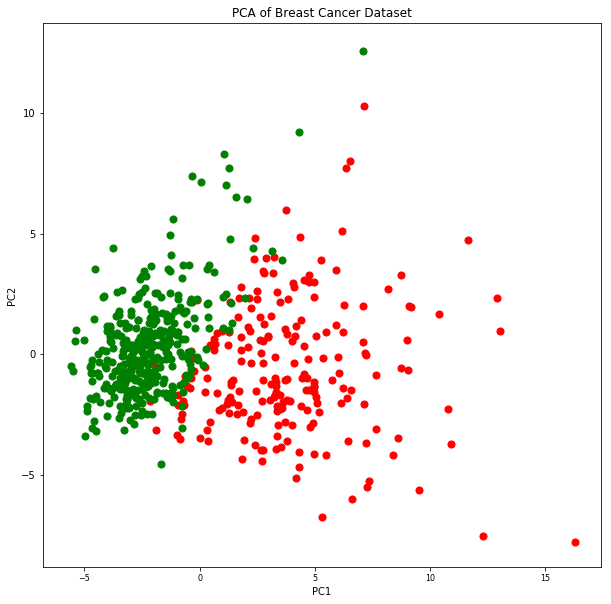

In [170]:
print('Explained variation per principal component:{}'.format(pca.explained_variance_ratio_))
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=8)
plt.yticks(fontsize=10)
plt.xlabel('PC1',fontsize=10)
plt.ylabel('PC2',fontsize=10)
plt.title("PCA of Breast Cancer Dataset",fontsize=12)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df['label'] == target 
    plt.scatter(principal_df.loc[indicesToKeep, 'PC1'], principal_df.loc[indicesToKeep, 'PC2'], c = color, s = 50)

In [201]:

models = {
"knn": KNeighborsClassifier(n_neighbors=1),
"naive_bayes": GaussianNB(),
"logit": LogisticRegression(solver="lbfgs", multi_class="auto"),
"svm": SVC(kernel="rbf", gamma="auto"),
"decision_tree": DecisionTreeClassifier(),
"random_forest": RandomForestClassifier(n_estimators=100),}

In [172]:
df.shape

(569, 31)

In [173]:
df.drop(df.columns[[-1, 0]], axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 29 columns):
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 non-null float64
fractal dimension error    569 

In [174]:

(trainX, testX, trainY, testY) = train_test_split(principal_df, labels, random_state=3, test_size=0.25)

In [175]:
model_name="knn"
model = models[model_name]
model.fit(trainX, trainY)
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX)
print(classification_report(testY, predictions,
target_names=["Mlignant", "Benign"]))
#dataset = load_breast_cancer()


[INFO] evaluating...
              precision    recall  f1-score   support

    Mlignant       0.92      0.92      0.92        53
      Benign       0.96      0.96      0.96        90

   micro avg       0.94      0.94      0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



C:\Users\asus\Anaconda3a\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [176]:
principal_df.head()

,PC1,PC2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [195]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x) 
# normalizing the features: mean=0; std=1
y=bc.target
lda = LinearDiscriminantAnalysis(n_components=2)
np_lda=lda.fit(x,y).transform(x)
df_lda=pd.DataFrame(np_lda)
print('Explained variation per principal component: {}'.format(lda.explained_variance_ratio_))
df_lda.tail()

Explained variation per principal component: [1.]


,0
564,-4.525468
565,-2.928588
566,-0.968062
567,-5.879643
568,2.730590


In [199]:
print("[INFO] loading data...")
dataset = df_lda
(trainX, testX, trainY, testY) = train_test_split(dataset.values,
y, random_state=3, test_size=0.25)

[INFO] loading data...


In [205]:

model = models['knn']
model.fit(trainX, trainY)
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX)
print(classification_report(testY, predictions,
target_names=["Mlignant", "Benign"]))

[INFO] evaluating...
              precision    recall  f1-score   support

    Mlignant       0.96      0.96      0.96        53
      Benign       0.98      0.98      0.98        90

   micro avg       0.97      0.97      0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

